# 6.4 바른 학습을 위해  

## 6.4.1 오버피팅  

오버피팅이 일어나는 경우  

    * 매개변수가 많고 표현력이 높은 모델  
    * 훈련데이터가 적을 때  

오버피팅을 일으키기 위해 MNIST 데이터셋에서 훈련데이터를 300개만 사용하고, 7층 네트워크로 복잡성을 높여보자  
각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용한다.  

epoch:0, train acc:0.08666666666666667, test acc:0.0973
epoch:1, train acc:0.1, test acc:0.1117
epoch:2, train acc:0.13, test acc:0.1215
epoch:3, train acc:0.15333333333333332, test acc:0.1276
epoch:4, train acc:0.19333333333333333, test acc:0.1477
epoch:5, train acc:0.23333333333333334, test acc:0.1706
epoch:6, train acc:0.26, test acc:0.1862
epoch:7, train acc:0.30333333333333334, test acc:0.2151
epoch:8, train acc:0.3466666666666667, test acc:0.2393
epoch:9, train acc:0.38, test acc:0.2641
epoch:10, train acc:0.41, test acc:0.2942
epoch:11, train acc:0.42333333333333334, test acc:0.3077
epoch:12, train acc:0.4666666666666667, test acc:0.3271
epoch:13, train acc:0.49333333333333335, test acc:0.341
epoch:14, train acc:0.48333333333333334, test acc:0.3521
epoch:15, train acc:0.5066666666666667, test acc:0.3662
epoch:16, train acc:0.5133333333333333, test acc:0.3748
epoch:17, train acc:0.5166666666666667, test acc:0.3855
epoch:18, train acc:0.55, test acc:0.3905
epoch:19, train acc:0.55

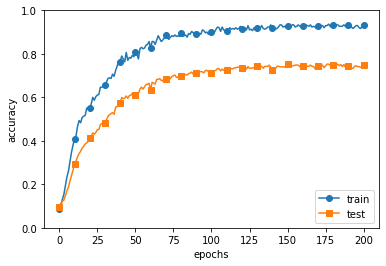

In [3]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

훈련 데이터에서는 정확도가 100%가량 나오지만 test set은 큰 차이를 보인다.  
정확도가 훈련 데이터에 적응했기 때문이다.  

## 6.4.2 가중치 감소  

가중치 감소(weight decay): 오버피팅 억제용으로 많이 이용해온 방법  
큰 가중치에 대해서 그에 상응하는 페널티를 부과하여 오버피팅을 억제하는 방법이다.  

예를 들어 가중치 제곱법칙(L2 법칙)을 손실함수에 더한다.  
